## Decision Tree Model

Decision Trees are used for predict probability and classification. It's more intuitive than regression. We are going 
to use some sample data to illustrate this model.
we are going to import some dummy data.

In this example, two different files are used to train and validate the machine learning model.  The features are explicitly mapped to the codes to ensure consistency among the training and test dataframes. 

In [33]:
# import the things we need first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [34]:
# we want to read in the csv files provided, noticed the path down in the read_csv() can be changed as we like.
df_train = pd.read_csv('Decision_Tree_bankloan-train.csv') # read in training data file
df_test = pd.read_csv('Decision_Tree_bankloan-test.csv') # read in testing data file
df_test.head() # show the first five rows of the test data

,Age,Has_job,Own_house,Outcome
0,old,False,False,Yes
1,old,False,False,Yes
2,old,False,False,Yes


### Preprocess the data

We are going to put training and testing data in two dataframe.

In [35]:
df_train

,Age,Has_job,Own_house,Outcome
0,young,True,True,No
1,young,True,False,Yes
2,young,False,True,Yes
3,young,False,False,No
4,old,True,True,Yes
5,old,True,False,No
6,old,False,True,Yes
7,old,False,False,Yes
8,old,False,False,Yes
9,old,False,False,Yes


In [36]:
df_train['Age']

0     young
1     young
2     young
3     young
4       old
5       old
6       old
7       old
8       old
9       old
10      old
11      old
12      old
Name: Age, dtype: object

In [37]:
# when we construct the dataframe, Pandas automatically set the type of Has_job and Own_house values to Boolean
# we can change it by mapping them to strings

# dictionary for mapping
boolDict = {
    True: 'True',
    False: 'False'
}

# we should only map these two rows
for i in [1,2]:
    df_train.iloc[:, i] = df_train.iloc[:, i].map(boolDict)
    df_test.iloc[:, i] = df_test.iloc[:, i].map(boolDict)

In [38]:
# to customize what value for each feature to be mapped to 
# we can provide a dictionary that has all the mapping rules


mydict = {
    "Yes": 1,
    "No": 0,
    'True': 0,
    'False': 1,
    "young": 0,
    "old": 1
}

# construct a function that can take a dataframe and
# map all the categorical values in each column according
# to our dictionary
def outcomeTrans(X):
    cols = list(X)
    for i in cols:
        X[i] = X[i].map(mydict)
    return X
        

# mapping for both dataset
outcomeTrans(df_train)
outcomeTrans(df_test)
df_train.head()

,Age,Has_job,Own_house,Outcome
0,0,0,0,0
1,0,0,1,1
2,0,1,0,1
3,0,1,1,0
4,1,0,0,1


In [39]:
df_test

,Age,Has_job,Own_house,Outcome
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1


We have the data prepared. We can do train test split now.

In [40]:
# RUN THIS
# set training data variable & target
# set testing data variable & target
x_train = df_train.iloc[:, 0:3]
y_train = df_train['Outcome']
x_test = df_test.iloc[:, 0:3]
y_test = df_test['Outcome']

In [41]:
# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) # train our model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
x_train

,Age,Has_job,Own_house
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1
8,1,1,1
9,1,1,1


In [43]:
y_train

0     0
1     1
2     1
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    1
Name: Outcome, dtype: int64

In [44]:
y_pred = dt.predict(x_test) # let the model predict the test data

In [45]:
y_test

0    1
1    1
2    1
Name: Outcome, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [47]:
print(y_pred) # what the model predict entertainment labels
print(y_test) # true labels


[1 1 1]
0    1
1    1
2    1
Name: Outcome, dtype: int64


Compare the predicted labels and true labels, we can see there is only one of them matches (index: 14, y_pred and y_test both have '1'). The accuracy score formula can be seen as

$$ accuracy\_score = \frac{number\_of\_matches}{number\_of\_samples} $$

In this case number of matches is 1, and there are 4 samples in total. Thus the accuracy_score is $1/4 = 0.25$

In [48]:
## we can use the model to predict any data

print(dt.predict([[1, 0,1]])) # predict Age = young, Has_job = False, Own_house = True
print(dt.predict([[1, 0,0]])) # predict Age = young, Has_job = False, Own_house = False

[0]
[1]


In [49]:
x_test_simple = [[1, 0, 1]]
y_test_simple = [1]
y_pred_simple = dt.predict(x_test_simple)
print(y_test_simple)
print(y_pred_simple)
# the prediction is correct

[1]
[0]


### Visualize the Decision Tree

we can use `graphviz` to see what the decision tree looks like

First, run this in the directory this file is in
```
conda install python-graphviz
```

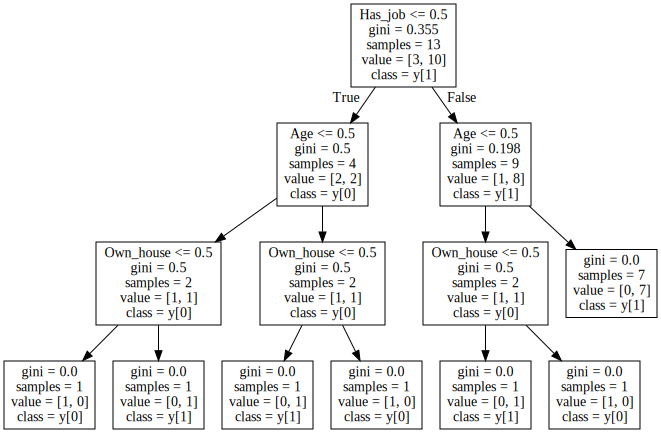

In [50]:
# show the decision tree model
# import graphviz and sklearn.tree first
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

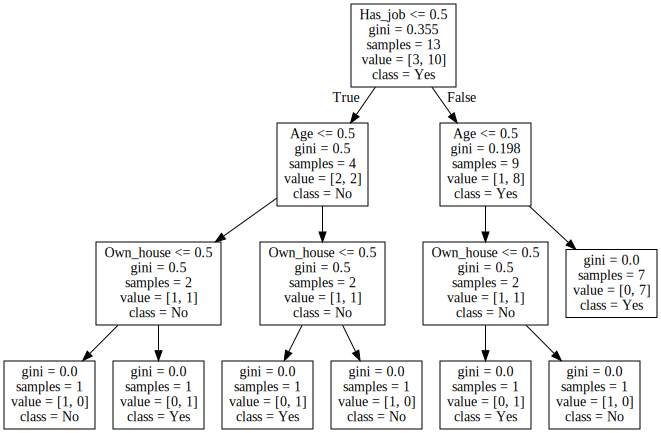

In [51]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=['No', 'Yes'], feature_names= x_train.columns)) # display the tree, with no output file

- first row is the feature the tree uses to group child nodes. For example: from the root, any data with age <= 0.5
    goes to the left child, any data with age > 0.5 goes to the right child
- second row is the gini score which gives how good the split is. the best scenario is gini = 0 which means all data
    in this group are from the same class. gini = 0.5 means half of the group are from one class the others are from the other one
- thrid row is how many samples go in this group
- fourth row is an array with the number of each class in this group. e.g. the root has value = [1, 11] which means
    one class 0 and eleven class 1 are in this group
- fifth row gives what class most data in this group are in 